# Rolling and Expanding

In [2]:
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


### Rolling

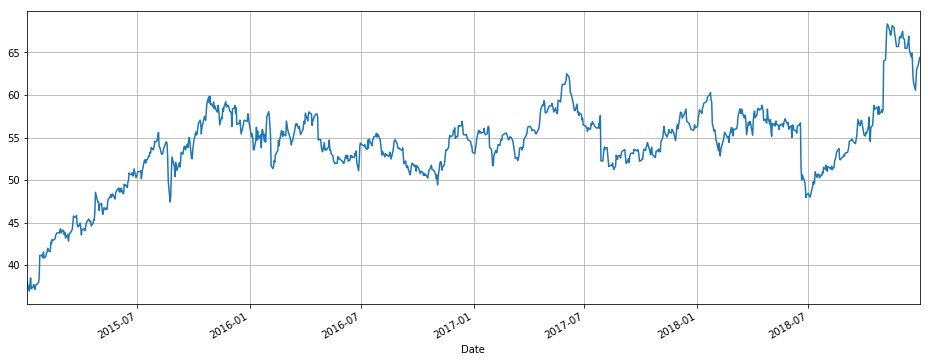

In [9]:
df['Close'].plot(figsize=(16,6),grid=True);

### Ejemplo: Cada 7 días tomaremos la media y lo moveremos con esa ventana de 7 días

- Es decir, la media de 7 días se moverá por todo el dataframe 

In [17]:
df.rolling(window=7).mean().head(20)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


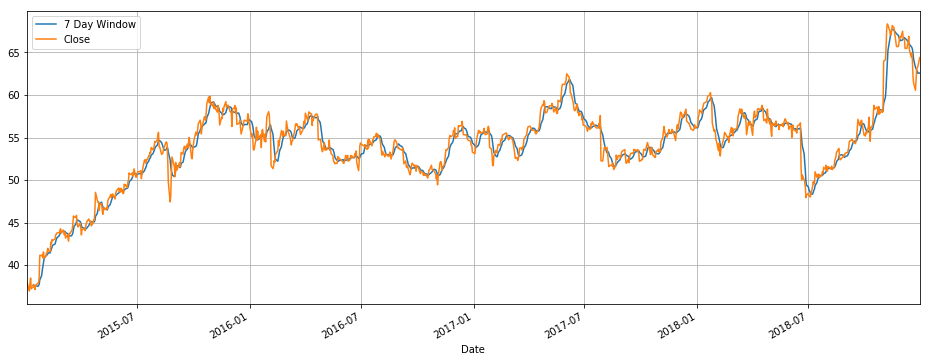

In [33]:
df['Close'].rolling(window=7).mean().plot(figsize=(16,6),grid=True,label='7 Day Window',legend=True)
df['Close'].plot(figsize=(16,6),grid=True,label='Close',legend=True);

### Puedes ver la tendencia general cada X DAY WINDOW, de esta forma se puede observar con mas smoother

In [23]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [24]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


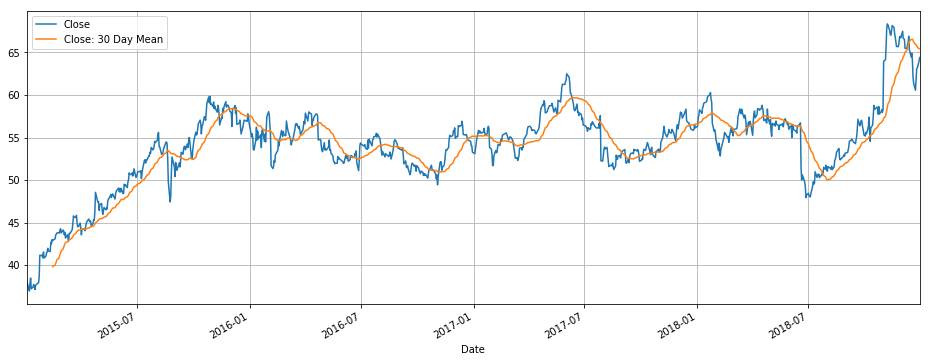

In [34]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6),grid=True);

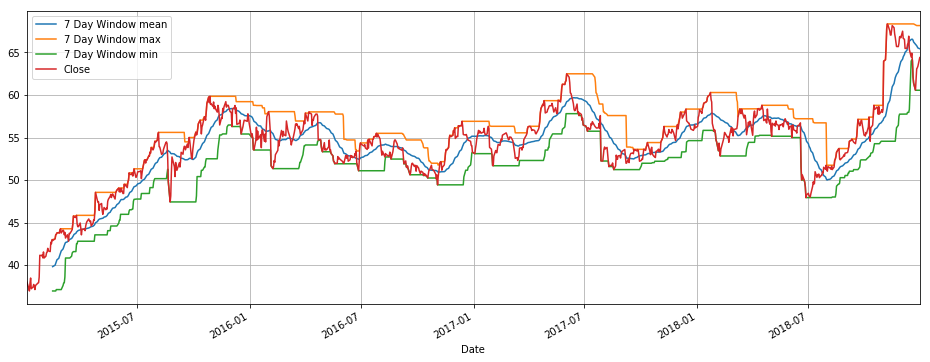

In [48]:
df['Close'].rolling(window=30).mean().plot(figsize=(16,6),grid=True,label='7 Day Window mean',legend=True)
df['Close'].rolling(window=30).max().plot(figsize=(16,6),grid=True,label='7 Day Window max',legend=True)
df['Close'].rolling(window=30).min().plot(figsize=(16,6),grid=True,label='7 Day Window min',legend=True)
df['Close'].plot(figsize=(16,6),grid=True,label='Close',legend=True);

### Expanding

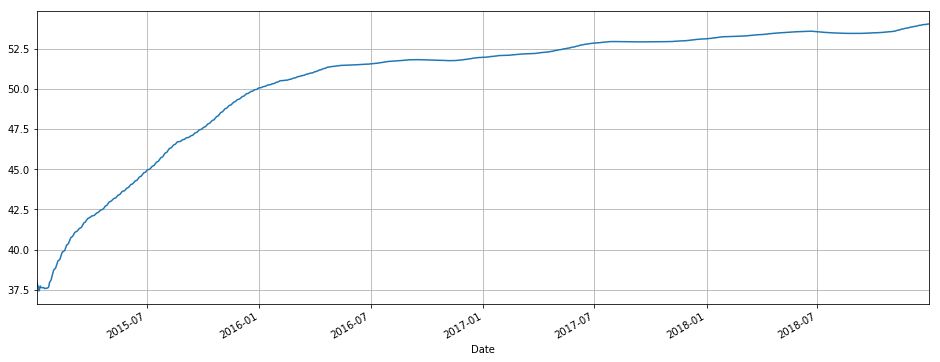

In [36]:
# Cada valor es calculado como la media de todos sus predecersores
# Por lo tanto, el último valor es la media de toda la columna Close
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6),grid=True);

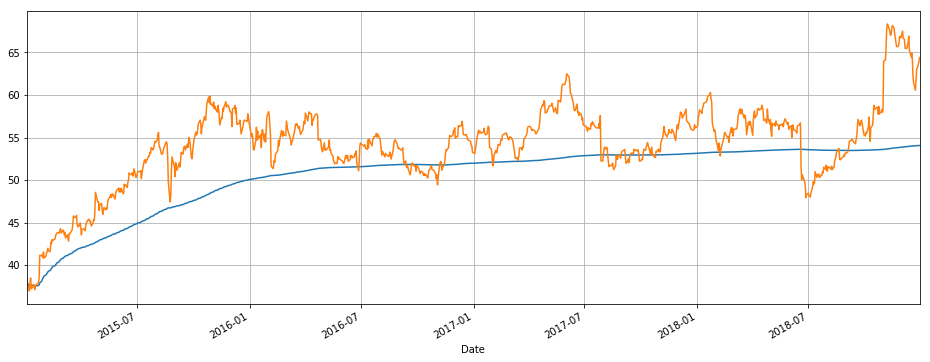

In [37]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6),grid=True)
df['Close'].plot(figsize=(16,6),grid=True);

In [38]:
df['Close'].mean()

54.07013280318091

#### Como vemos, la curva de expanding, al ser la media de todos los valores anteriores al observado, va convergiendo al valor de la media de la columna (último valor observado)

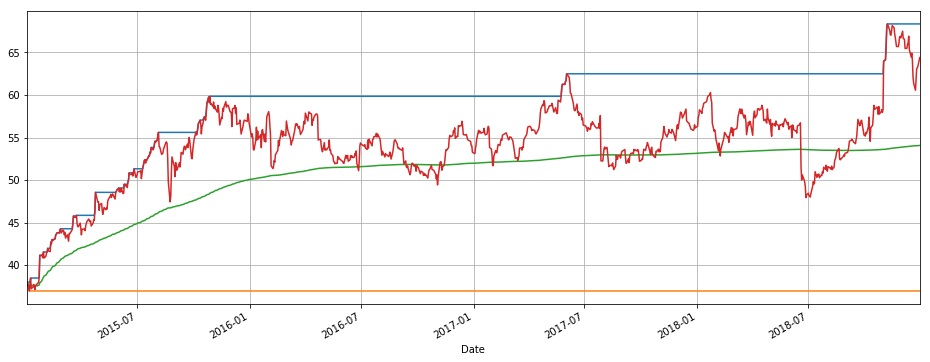

In [45]:
df['Close'].expanding(min_periods=1).max().plot(figsize=(16,6),grid=True)
df['Close'].expanding(min_periods=1).min().plot(figsize=(16,6),grid=True)
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6),grid=True)
df['Close'].plot(figsize=(16,6),grid=True);